# **DATASET IRIS**

In [ ]:
#1. Import Library dan Dataset
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold

# Load dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Bagian pertama kode berfungsi untuk mengimpor berbagai library yang dibutuhkan serta mempersiapkan dataset. Library seperti pandas dan numpy digunakan untuk pengolahan data, sedangkan matplotlib digunakan untuk visualisasi hasil. Dari scikit-learn, beberapa modul diimpor untuk memuat dataset, membuat model klasifikasi (Decision Tree, Random Forest, dan Extra Trees), serta melakukan evaluasi seperti confusion matrix, ROC curve, dan learning curve.

Selanjutnya, dataset Iris dimuat dari sklearn.datasets. Dataset ini berisi empat fitur utama (panjang dan lebar sepal serta petal) dan tiga kelas target bunga (setosa, versicolor, dan virginica). Data kemudian dipisahkan menjadi dua bagian menggunakan fungsi train_test_split, yaitu 80% untuk data latih dan 20% untuk data uji. Pembagian ini dilakukan secara terstratifikasi agar proporsi tiap kelas tetap seimbang.

Secara keseluruhan, tahap ini bertujuan untuk menyiapkan lingkungan kerja dan data yang akan digunakan dalam proses pelatihan dan evaluasi model machine learning selanjutnya.

In [ ]:
#2. Buat dan Latih Model
# Base Classifier: Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Bagging Classifier 1: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Bagging Classifier 2: Extra Trees
et = ExtraTreesClassifier(n_estimators=100, random_state=42)
et.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

Bagian kedua kode digunakan untuk membuat dan melatih tiga model klasifikasi yang berbeda. Model pertama adalah **Decision Tree Classifier** yang berfungsi sebagai *base classifier* atau model dasar. Decision Tree bekerja dengan membangun struktur pohon keputusan berdasarkan fitur-fitur pada data untuk memisahkan kelas target.

Selanjutnya, dua model *ensemble* berbasis *bagging* digunakan, yaitu **Random Forest** dan **Extra Trees**. Keduanya merupakan pengembangan dari Decision Tree yang menggabungkan banyak pohon keputusan untuk meningkatkan akurasi dan stabilitas hasil. Random Forest membangun banyak pohon dari subset data yang diambil secara acak (*bootstrap sampling*) dan menggabungkan hasil prediksi melalui mekanisme *majority voting*. Sementara itu, Extra Trees bekerja dengan prinsip serupa namun menggunakan proses pembentukan pohon yang lebih acak, sehingga cenderung menghasilkan variasi model yang lebih besar dan mempercepat proses pelatihan.

Masing-masing model kemudian dilatih menggunakan data latih (`X_train` dan `y_train`). Parameter `random_state=42` digunakan agar proses pelatihan dapat direplikasi dengan hasil yang konsisten. Tahapan ini bertujuan untuk membandingkan kinerja antara model tunggal (Decision Tree) dengan dua model *ensemble* (Random Forest dan Extra Trees) pada data uji di tahap selanjutnya.


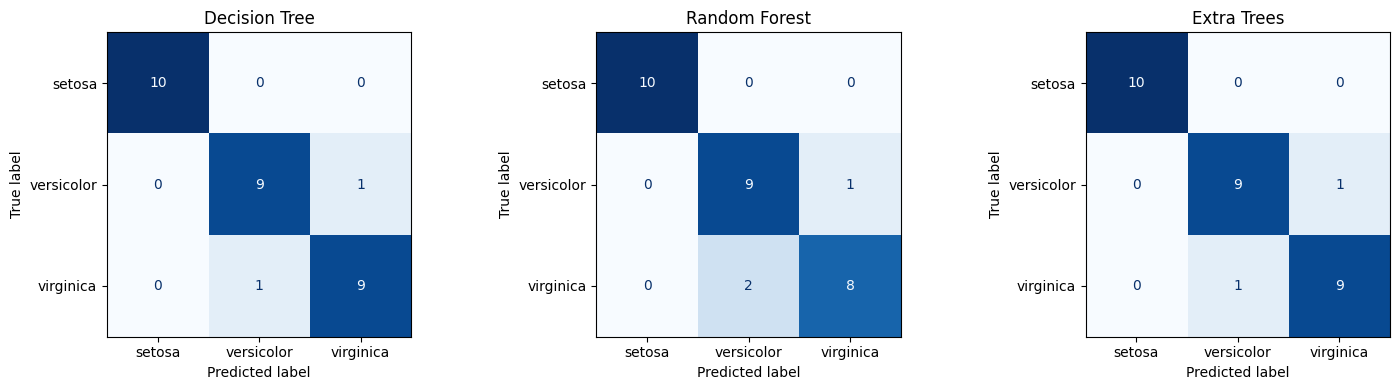

In [ ]:
#3. Evaluasi Model dengan Confussion Matrix
models = {
    "Decision Tree": dt,
    "Random Forest": rf,
    "Extra Trees": et
}

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    ax.set_title(name)
plt.tight_layout()
plt.show()

Bagian ketiga kode digunakan untuk melakukan **evaluasi performa model** menggunakan **Confusion Matrix**. Tiga model yang telah dilatih sebelumnya—Decision Tree, Random Forest, dan Extra Trees—disimpan dalam sebuah dictionary bernama `models`. Kemudian, dilakukan proses prediksi terhadap data uji (`X_test`) untuk masing-masing model.

Setelah itu, hasil prediksi dibandingkan dengan label sebenarnya (`y_test`) untuk membentuk *confusion matrix* menggunakan fungsi `confusion_matrix()` dari *scikit-learn*. Confusion Matrix menampilkan jumlah prediksi yang benar dan salah untuk setiap kelas, sehingga dapat menunjukkan secara rinci di mana model melakukan kesalahan klasifikasi.

Visualisasi dibuat menggunakan `ConfusionMatrixDisplay`, dengan tampilan tiga grafik berdampingan dalam satu baris (1x3 subplot). Setiap grafik mewakili hasil evaluasi dari satu model—Decision Tree, Random Forest, dan Extra Trees—dengan warna biru yang menunjukkan intensitas jumlah prediksi yang benar.

Tahap ini bertujuan untuk memberikan gambaran visual yang jelas mengenai kemampuan masing-masing model dalam mengklasifikasikan data. Dari hasil Confusion Matrix, dapat dilihat seberapa baik model mengenali tiap kelas bunga pada dataset Iris serta perbandingan akurasi antar model *ensemble* dengan model dasar.


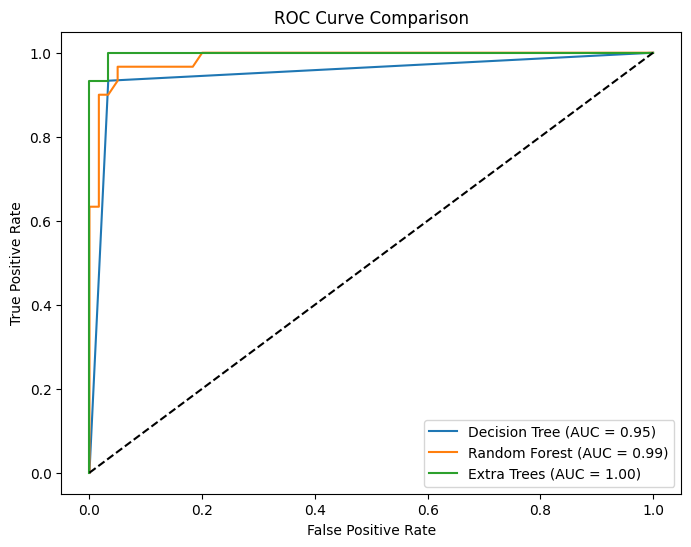

In [ ]:
#4. Evaluasi dengan ROC/AUC Curve
# Binarisasi label untuk ROC multi-class
y_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

plt.figure(figsize=(8,6))
for name, model in models.items():
    y_score = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Bagian keempat kode digunakan untuk melakukan **evaluasi model menggunakan ROC (Receiver Operating Characteristic) Curve dan AUC (Area Under Curve)**, yang bertujuan menilai kemampuan model dalam membedakan antara kelas-kelas target.

Karena dataset Iris memiliki **tiga kelas (multi-class classification)**, langkah pertama dilakukan **binarisasi label** menggunakan fungsi `label_binarize()`. Proses ini mengubah label kelas menjadi format biner (misalnya `[1, 0, 0]`, `[0, 1, 0]`, `[0, 0, 1]`) agar dapat digunakan dalam perhitungan ROC. Variabel `n_classes` menyimpan jumlah kelas hasil binarisasi.

Selanjutnya, dilakukan perhitungan **ROC Curve** untuk setiap model. Setiap model menghasilkan *probability score* terhadap kelas prediksi melalui fungsi `predict_proba()`. Nilai tersebut digunakan untuk menghitung **False Positive Rate (FPR)** dan **True Positive Rate (TPR)** dengan fungsi `roc_curve()`. Luas di bawah kurva (*Area Under Curve* atau **AUC**) dihitung menggunakan fungsi `auc()`, yang menggambarkan seberapa baik model dapat membedakan antar kelas — semakin tinggi nilai AUC (mendekati 1), semakin baik performa model.

Hasilnya divisualisasikan dalam satu grafik yang menampilkan kurva ROC untuk ketiga model (Decision Tree, Random Forest, dan Extra Trees). Garis diagonal hitam (`y = x`) berfungsi sebagai pembanding acak; model dengan kurva ROC di atas garis ini menunjukkan performa lebih baik daripada prediksi acak.

Secara keseluruhan, tahap ini memberikan evaluasi kuantitatif yang lebih mendalam dibandingkan Confusion Matrix, karena ROC/AUC menilai kemampuan model dalam klasifikasi di berbagai ambang keputusan (*thresholds*) dan memperlihatkan perbandingan kinerja model secara lebih menyeluruh.


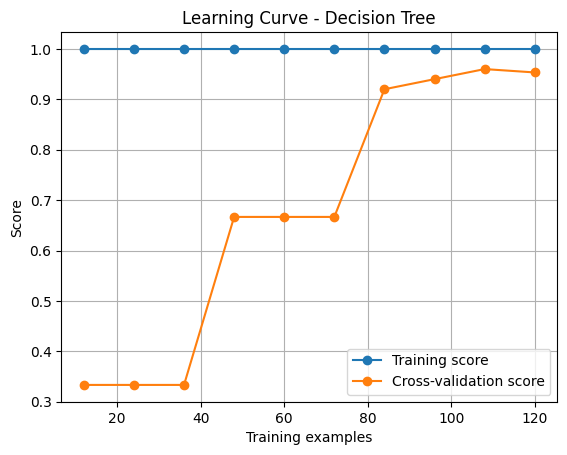

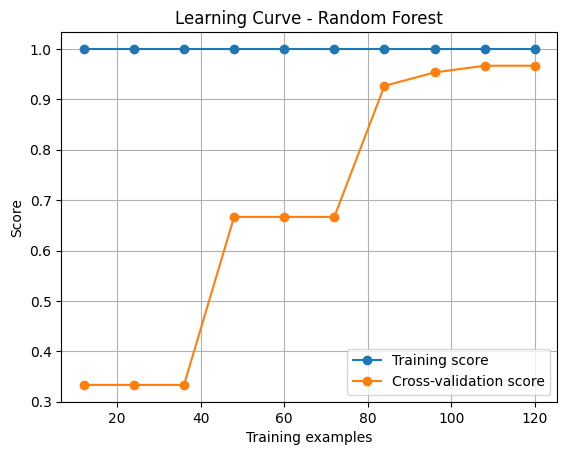

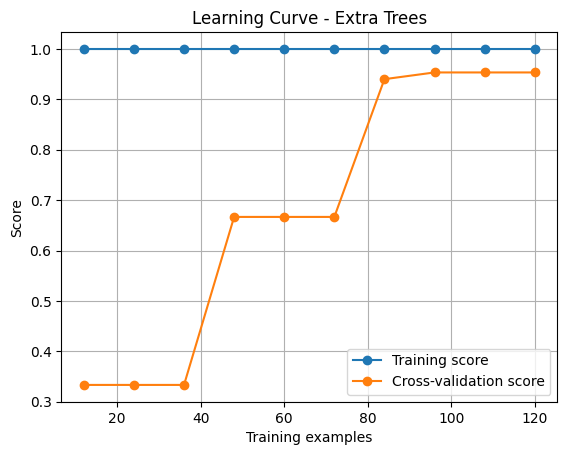

In [ ]:
#5. Visualisasi Learning Curve
def plot_learning_curve(model, title):
    plt.figure()
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=StratifiedKFold(5), n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_learning_curve(dt, "Learning Curve - Decision Tree")
plot_learning_curve(rf, "Learning Curve - Random Forest")
plot_learning_curve(et, "Learning Curve - Extra Trees")

Bagian kelima kode digunakan untuk **memvisualisasikan *Learning Curve*** dari ketiga model yang telah dilatih, yaitu Decision Tree, Random Forest, dan Extra Trees. *Learning Curve* berfungsi untuk menunjukkan bagaimana **kinerja model berubah seiring dengan bertambahnya jumlah data pelatihan**, sehingga dapat membantu menganalisis apakah model mengalami *overfitting* atau *underfitting*.

Fungsi `plot_learning_curve()` dibuat untuk menghasilkan grafik tersebut. Di dalam fungsi, digunakan `learning_curve()` dari *scikit-learn* dengan metode *cross-validation* menggunakan `StratifiedKFold(5)` untuk memastikan pembagian data tetap proporsional terhadap kelas. Parameter `train_sizes` diatur menggunakan `np.linspace(0.1, 1.0, 10)`, yang berarti data latih diambil mulai dari 10% hingga 100% secara bertahap.

Dua garis kemudian digambar:

* **Training score** (garis biru) menunjukkan tingkat akurasi model terhadap data pelatihan.
* **Cross-validation score** (garis oranye) menunjukkan akurasi terhadap data validasi silang, yang merepresentasikan kemampuan generalisasi model.

Grafik dilengkapi dengan label, legenda, dan grid agar mudah dibaca. Setelah fungsi didefinisikan, *learning curve* dipanggil untuk ketiga model secara terpisah, masing-masing dengan judul yang berbeda.

Secara keseluruhan, tahap ini bertujuan untuk mengevaluasi **stabilitas dan kemampuan generalisasi model**. Jika *training score* jauh lebih tinggi dari *validation score*, model cenderung *overfitting*. Sebaliknya, jika keduanya rendah, model mengalami *underfitting*. Dengan visualisasi ini, dapat dianalisis seberapa efisien tiap model dalam belajar dari data dan seberapa baik kinerjanya saat dihadapkan pada data baru.


# **Dataset Heart Attack Analysis & Prediction Dataset**

In [ ]:
#1. Import Library dan Load Dataset
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report
from sklearn.preprocessing import label_binarize

# Load dataset
data = pd.read_csv("/content/heart.csv")
print("Jumlah data:", data.shape)
data.head()


Jumlah data: (303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Bagian pertama kode digunakan untuk **mengimpor library yang diperlukan** dan **memuat dataset Heart Attack Analysis & Prediction**. Beberapa library utama yang digunakan yaitu *pandas* dan *numpy* untuk pengolahan data, *matplotlib* serta *seaborn* untuk visualisasi grafik, dan *scikit-learn* untuk pemodelan serta evaluasi *machine learning*. Modul dari *scikit-learn* yang digunakan mencakup proses pembagian data, standarisasi fitur, pembuatan model (Decision Tree, Random Forest, dan Extra Trees), serta berbagai metrik evaluasi seperti *confusion matrix* dan *ROC curve*.

Selanjutnya, dataset dibaca menggunakan `pd.read_csv("/content/heart.csv")`, yang memuat data prediksi serangan jantung. Dataset ini biasanya berisi sejumlah fitur medis seperti **umur, jenis kelamin, tekanan darah, kadar kolesterol, detak jantung maksimum, dan hasil pemeriksaan elektrokardiografi**, dengan kolom `target` sebagai label keluaran (1 = berisiko serangan jantung, 0 = tidak berisiko).

Perintah `data.shape` digunakan untuk menampilkan jumlah baris dan kolom dalam dataset, sedangkan `data.head()` menampilkan beberapa baris pertama untuk melihat struktur datanya. Tahap ini bertujuan untuk memastikan data berhasil dimuat dan siap diproses sebelum dilakukan analisis dan pemodelan selanjutnya.


In [ ]:
#2. Data Preprocessing
# Cek missing values
print(data.isnull().sum())

# Info tipe data
print(data.info())

# Normalisasi/standarisasi fitur numerik
X = data.drop('output', axis=1)
y = data['output']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


Bagian kedua kode berfungsi untuk melakukan **tahap pra-pemrosesan data (data preprocessing)** sebelum data digunakan dalam proses pelatihan model *machine learning*.

Langkah pertama adalah **mengecek adanya nilai yang hilang (missing values)** dengan `data.isnull().sum()`. Hal ini penting untuk memastikan tidak ada data kosong yang dapat mengganggu proses analisis atau pelatihan model. Kemudian, `data.info()` digunakan untuk menampilkan informasi tipe data dari setiap kolom, termasuk jumlah entri, tipe variabel (numerik atau kategorikal), dan apakah terdapat nilai kosong.

Selanjutnya dilakukan **pemisahan antara fitur (X)** dan **target (y)**. Fitur `X` terdiri dari semua kolom kecuali kolom target (`output`), sedangkan `y` berisi nilai `output` yang menunjukkan kondisi pasien (1 = berisiko serangan jantung, 0 = tidak berisiko).

Proses berikutnya adalah **standarisasi fitur numerik** menggunakan `StandardScaler()` dari *scikit-learn*. Tahap ini mengubah skala seluruh fitur agar memiliki rata-rata 0 dan standar deviasi 1, sehingga model dapat belajar dengan lebih stabil dan tidak bias terhadap fitur yang memiliki rentang nilai besar.

Terakhir, dataset dibagi menjadi **data latih (80%)** dan **data uji (20%)** menggunakan `train_test_split()`. Parameter `stratify=y` digunakan agar proporsi antara kelas 0 dan 1 tetap seimbang di kedua subset data, sedangkan `random_state=42` menjamin hasil pembagian yang konsisten setiap kali kode dijalankan.

Secara keseluruhan, tahap ini memastikan bahwa data dalam kondisi bersih, terstandarisasi, dan terdistribusi dengan baik sebelum masuk ke proses pemodelan.


In [ ]:
#3. Buat dan Latih Model
# Base Classifier: Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Bagging Classifier 1: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Bagging Classifier 2: Extra Trees
et = ExtraTreesClassifier(n_estimators=100, random_state=42)
et.fit(X_train, y_train)


ExtraTreesClassifier(random_state=42)

Bagian ketiga kode digunakan untuk **membangun dan melatih model klasifikasi** berdasarkan dataset Heart Attack Analysis & Prediction. Tiga model yang digunakan terdiri dari satu model dasar (*base classifier*) dan dua model *ensemble* dengan metode *bagging*.

Model pertama adalah **Decision Tree Classifier**, yang berfungsi sebagai model dasar. Algoritma ini bekerja dengan membuat struktur pohon keputusan berdasarkan fitur-fitur pada data untuk memisahkan kelas target. Proses pemisahan dilakukan dengan memilih atribut yang paling informatif menggunakan ukuran seperti *Gini Impurity* atau *Entropy*.

Selanjutnya, dua model *ensemble* dibuat untuk meningkatkan akurasi dan stabilitas hasil prediksi:

1. **Random Forest Classifier**, yang merupakan gabungan dari banyak pohon keputusan. Setiap pohon dilatih menggunakan subset data dan fitur yang diambil secara acak (*bootstrap sampling*). Hasil prediksi akhir diperoleh dari *voting* mayoritas antar pohon.
2. **Extra Trees Classifier**, yang juga menggabungkan banyak pohon, namun memilih titik pemisahan (split) secara lebih acak dibanding Random Forest. Hal ini membuat proses pelatihan lebih cepat dan sering kali menghasilkan generalisasi yang lebih baik.

Ketiga model dilatih menggunakan data latih (`X_train` dan `y_train`), dengan `random_state=42` untuk menjaga konsistensi hasil. Tahapan ini menjadi dasar untuk perbandingan performa antara model tunggal (Decision Tree) dan dua model *ensemble* (Random Forest dan Extra Trees) pada data uji yang akan dievaluasi di langkah berikutnya.


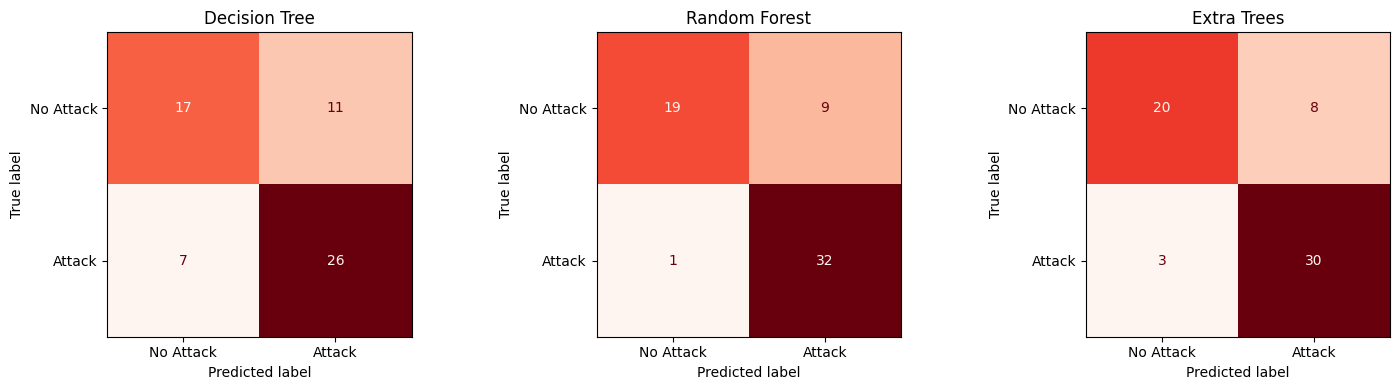

In [ ]:
#4. Evaluasi Model dengan Confusion Matrix
models = {
    "Decision Tree": dt,
    "Random Forest": rf,
    "Extra Trees": et
}

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Attack", "Attack"])
    disp.plot(ax=ax, cmap="Reds", colorbar=False)
    ax.set_title(name)
plt.tight_layout()
plt.show()


Bagian keempat kode digunakan untuk melakukan **evaluasi performa model** menggunakan **Confusion Matrix**. Evaluasi ini bertujuan untuk melihat sejauh mana setiap model mampu mengklasifikasikan data pasien dengan benar ke dalam dua kategori, yaitu *“No Attack”* (tidak berisiko serangan jantung) dan *“Attack”* (berisiko serangan jantung).

Langkah pertama adalah menyimpan ketiga model yang telah dilatih—Decision Tree, Random Forest, dan Extra Trees—ke dalam sebuah dictionary bernama `models`. Selanjutnya, setiap model digunakan untuk memprediksi data uji (`X_test`) melalui perulangan `for`. Hasil prediksi (`y_pred`) dibandingkan dengan nilai aktual (`y_test`) menggunakan fungsi `confusion_matrix()` dari *scikit-learn*.

Confusion Matrix menampilkan empat nilai penting:

* **True Positive (TP)**: prediksi *Attack* yang benar,
* **True Negative (TN)**: prediksi *No Attack* yang benar,
* **False Positive (FP)**: data *No Attack* yang salah diprediksi sebagai *Attack*,
* **False Negative (FN)**: data *Attack* yang salah diprediksi sebagai *No Attack*.

Visualisasi dibuat menggunakan `ConfusionMatrixDisplay`, dengan tiga grafik ditampilkan berdampingan (1 baris × 3 kolom). Setiap grafik menampilkan hasil dari masing-masing model dengan pewarnaan *Reds*, di mana intensitas warna menunjukkan jumlah prediksi pada tiap kategori.

Tahap ini memudahkan perbandingan langsung antar model untuk melihat mana yang menghasilkan klasifikasi paling akurat. Semakin besar nilai diagonal utama (TP dan TN), maka semakin baik performa model tersebut dalam mengenali pasien yang berisiko maupun tidak berisiko terhadap serangan jantung.


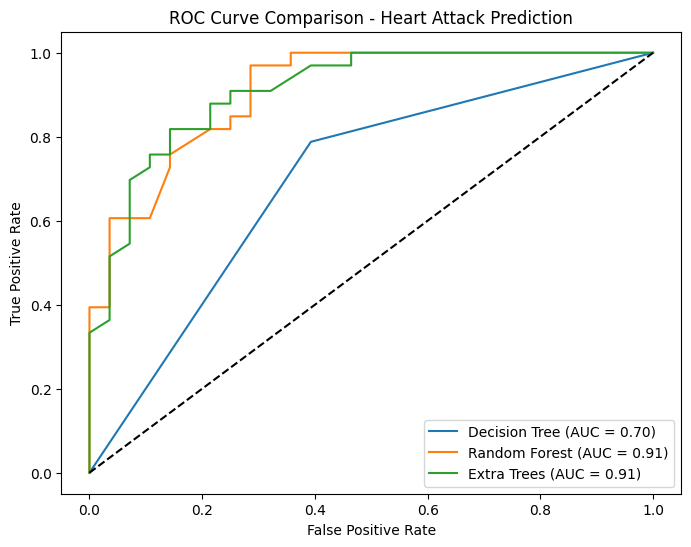

In [ ]:
#5. Evaluasi Tambahan: ROC Curve dan AUC
plt.figure(figsize=(8,6))
for name, model in models.items():
    y_score = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve Comparison - Heart Attack Prediction")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


Bagian kelima kode digunakan untuk melakukan **evaluasi tambahan terhadap model menggunakan ROC Curve dan nilai AUC (Area Under Curve)**. Evaluasi ini bertujuan untuk mengukur kemampuan model dalam membedakan antara dua kelas, yaitu pasien yang **berisiko serangan jantung (Attack)** dan yang **tidak berisiko (No Attack)**.

Untuk setiap model (Decision Tree, Random Forest, dan Extra Trees), dilakukan perhitungan probabilitas prediksi terhadap kelas positif (*Attack*) menggunakan `predict_proba(X_test)[:,1]`. Nilai probabilitas ini kemudian digunakan untuk menghitung **False Positive Rate (FPR)** dan **True Positive Rate (TPR)** melalui fungsi `roc_curve()` dari *scikit-learn*. Selanjutnya, luas di bawah kurva ROC dihitung menggunakan fungsi `auc()`, yang menghasilkan nilai **AUC** sebagai indikator performa model.

Secara umum:

* Nilai **AUC = 1.0** menunjukkan model sempurna.
* Nilai **AUC = 0.5** menunjukkan model sama buruknya dengan prediksi acak.
* Semakin tinggi nilai AUC, semakin baik kemampuan model dalam membedakan antara dua kelas target.

Grafik ROC kemudian divisualisasikan untuk ketiga model dalam satu plot, dengan garis diagonal hitam (`y = x`) sebagai pembanding model acak. Kurva yang semakin menjauh dari garis diagonal menandakan performa model yang lebih baik.

Tahap ini memberikan gambaran yang lebih komprehensif dibandingkan *Confusion Matrix* karena ROC/AUC memperlihatkan performa model di berbagai ambang batas (*threshold*) keputusan. Dengan cara ini, dapat diketahui model mana yang paling efektif dalam mendeteksi pasien berisiko serangan jantung dengan tingkat kesalahan minimal.


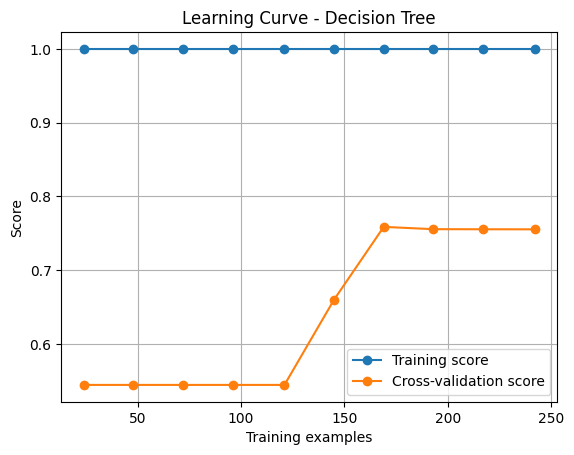

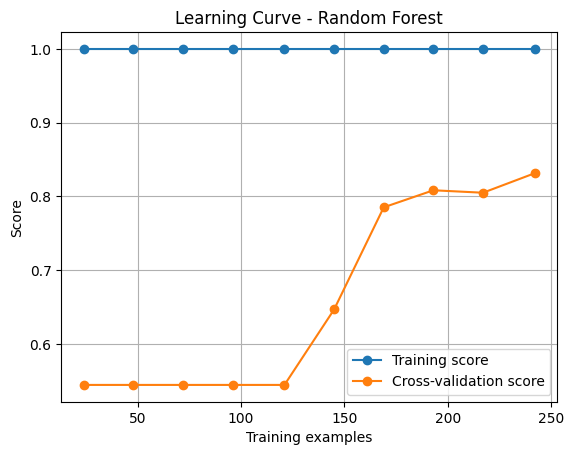

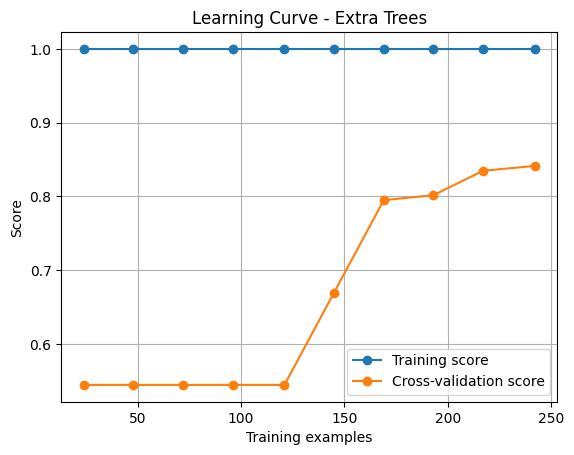

In [ ]:
#6. Visualisasi Learning Curve
def plot_learning_curve(model, title):
    plt.figure()
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_scaled, y, cv=StratifiedKFold(5), n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_learning_curve(dt, "Learning Curve - Decision Tree")
plot_learning_curve(rf, "Learning Curve - Random Forest")
plot_learning_curve(et, "Learning Curve - Extra Trees")


Bagian keenam kode digunakan untuk **visualisasi *Learning Curve*** dari ketiga model yang digunakan, yaitu **Decision Tree**, **Random Forest**, dan **Extra Trees**. Tujuan dari *learning curve* adalah untuk **menilai bagaimana performa model berubah seiring dengan bertambahnya jumlah data pelatihan**, serta untuk mendeteksi adanya gejala **overfitting** atau **underfitting** pada model.

Fungsi `plot_learning_curve()` memanfaatkan metode `learning_curve()` dari *scikit-learn*, yang menghitung **skor akurasi pada data pelatihan dan validasi silang** untuk berbagai ukuran subset data pelatihan (`train_sizes`). Dalam hal ini, data dibagi menggunakan **Stratified K-Fold (cv=5)** agar proporsi kelas tetap seimbang di setiap lipatan (*fold*).

Hasil yang ditampilkan berupa dua garis utama:

* **Training score**: menunjukkan akurasi model pada data pelatihan.
* **Cross-validation score**: menunjukkan akurasi model pada data uji validasi.

Interpretasi umum:

* Jika *training score* tinggi namun *cross-validation score* rendah dan jarak keduanya besar, maka model mengalami **overfitting** (terlalu menyesuaikan data latih).
* Jika kedua skor rendah, maka model mengalami **underfitting** (belum mampu mempelajari pola data dengan baik).
* Jika kedua skor tinggi dan saling mendekati, berarti model memiliki **bias dan variansi yang seimbang**, menandakan model bekerja secara optimal.

Dengan memplot *learning curve* untuk ketiga model, peneliti dapat mengevaluasi stabilitas performa dan efisiensi pembelajaran setiap algoritma. Biasanya, **Random Forest** dan **Extra Trees** menunjukkan kurva yang lebih stabil dan generalisasi yang lebih baik dibanding **Decision Tree** tunggal, karena mereka merupakan hasil dari teknik **ensemble bagging** yang mengurangi variansi model.
